# PART 3: PLOT AND PLAY

In [1]:
# pip install pixiedust

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import pixiedust
import seaborn as sns
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

py.init_notebook_mode(connected=True)


Pixiedust database opened successfully


## Sampling distributions

In this notebook we are using the CCHS data to explore the sampling distributions of statistics. Some of the illustrations  below are not things that would typically be done in a data analysis, but rather are intended to clarify some important concepts about the statistical analysis.  However our approach demostrates how a statistic behaves in a "nonstandard" setting, or to assess how much data is needed to answer a question confidently.

In [3]:
# Setting Jupyter Notebook's configuration to display max number of cells in all dimensions
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [4]:
# Reading the dataset using pandas, dropping a useless column and printing the first five rows
cchs = pd.read_csv("cchs_clean.csv").drop(columns=['Unnamed: 0'])
cchs.head()

,alcofreq,alcoweek,biosex,agegroup,education,fruitvegtot,stressgen,stresswork,healthphys,healthment,satisfaction,province,hasdoctor,bmi,height,weight,incomegroup,workhoursperweek,firstlanguage,yrsmokedaily
0,2,0,Female,16.0,4,2.5,2,0,2,3,2,ON,Y,19.70,1.473,42.75,2.0,0,EN,6
1,8,7,Male,14.0,4,4.0,1,0,4,4,1,QC,Y,28.47,1.778,90.00,5.0,0,FR,5
2,6,0,Male,6.0,2,3.3,1,1,4,4,2,AB,N,27.05,1.778,85.50,5.0,80,EN,1
3,1,0,Female,11.0,2,2.7,3,3,4,3,1,ON,Y,29.00,1.600,74.25,4.0,35,EN,6
4,6,0,Male,11.0,1,1.1,4,3,2,2,2,AB,N,21.63,1.676,60.75,3.0,45,EN,1


In [5]:
print("Statistics of CCHS: ")
cchs.describe()

Statistics of CCHS: 


,alcofreq,alcoweek,agegroup,education,fruitvegtot,stressgen,stresswork,healthphys,healthment,satisfaction,bmi,height,weight,incomegroup,workhoursperweek,yrsmokedaily
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,4.058667,2.499333,9.846667,3.074000,4.736667,2.680000,1.812000,2.592667,2.980667,1.735333,26.428620,1.688562,75.521033,3.419333,21.402667,4.240667
std,2.265976,6.193511,3.651672,1.193373,2.497316,0.992433,1.591963,1.010987,0.928548,0.683322,5.348317,0.101027,16.971289,1.385920,22.080434,1.751035
min,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.470000,1.448000,38.700000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,7.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.000000,22.772500,1.600000,63.000000,2.000000,0.000000,4.000000
50%,4.000000,0.000000,10.000000,4.000000,4.400000,3.000000,2.000000,3.000000,3.000000,2.000000,25.625000,1.676000,74.250000,3.000000,16.500000,4.000000
75%,6.000000,2.000000,13.000000,4.000000,6.100000,3.000000,3.000000,3.000000,4.000000,2.000000,29.185000,1.778000,86.850000,5.000000,40.000000,6.000000
max,8.000000,94.000000,16.000000,4.000000,18.400000,5.000000,5.000000,4.000000,4.000000,5.000000,54.340000,1.956000,135.000000,5.000000,99.000000,6.000000


In [6]:
print("The shape of CCHS (data) is:", cchs.shape, "Rows and columns respectively")
print("Descriptive information about the dataset: ")
cchs.info()

The shape of CCHS (data) is: (1500, 20) Rows and columns respectively
Descriptive information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
alcofreq            1500 non-null int64
alcoweek            1500 non-null int64
biosex              1500 non-null object
agegroup            1500 non-null float64
education           1500 non-null int64
fruitvegtot         1500 non-null float64
stressgen           1500 non-null int64
stresswork          1500 non-null int64
healthphys          1500 non-null int64
healthment          1500 non-null int64
satisfaction        1500 non-null int64
province            1500 non-null object
hasdoctor           1500 non-null object
bmi                 1500 non-null float64
height              1500 non-null float64
weight              1500 non-null float64
incomegroup         1500 non-null float64
workhoursperweek    1500 non-null int64
firstlanguage       1500 non-null object
yrs

### Sampling distribution of the mean

Sampling distributions describe how the value of a statistic computed from data varies when repeated samples of data are obtained.  This can be explored mathematically, or by using a computer to simulate data repeatedly from a hypothetical population.  When working with non-simulated data (i.e. from a study like CCHS), we usually do not have the ability to explicitly obtain an "independent copy" of the sample to actually "see" its sampling distribution.  However we can "subsample" from a dataset to mimic what would happen if we were to sample repeatedly from the population that produced it.  A subsample is a random sample drawn from a larger data set, containing only a fraction of its observations.

In the notebook cell below, we repeatedly subsample two disjoint subsets of size 100 from the CCHS data, calculate the mean body mass index within each of these two subsets, then calculate the difference between these two means.  This difference reflects the "chance variation" that would have been observed if the CCHS project had only had the resources to sample 100 participants for their study.  By sampling two subsets of size 100 and comparing the resulting calculated means, we can see how the findings of two researchers independently studying the same population might differ from each other by chance.  

The subsampling process described above is then repeated 1000 times, so we can see how two samples of size 100 from the CCHS population tend to differ in terms of their mean body mass index.


In [7]:
m = 100 # Subsample size
sbp_diff = [] # Storage for our subsample mean differences

for i in range(1000):
    dx = cchs.sample(2*m)  # We need two subsamples of size m
    dx1 = dx.iloc[0:m, :]  # First subsample
    dx2 = dx.iloc[m:, :]  # Second subsample
    sbp_diff.append(dx1.bmi.mean() - dx2.bmi.mean())  # The difference of mean bmi values

In [8]:
print(dx.shape)
len(sbp_diff)

(200, 20)


1000

Next we look at the histogram of the 1000 mean differences generated above.  We see that they typically fall between negative 2 and positive 2.  This means that two researchers independently studying body mass indicator in the same population may by chance obtain results that are up to around 2 units different, but are quite unlikely to obtain results that are by chance more than 3 units different.

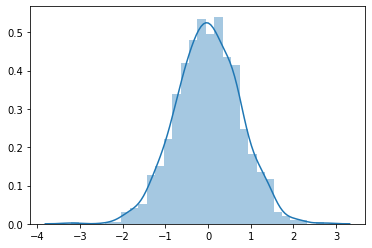

In [9]:
sns.distplot(sbp_diff)

In [10]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.004000
std         0.747368
min        -3.216500
25%        -0.496950
50%        -0.002550
75%         0.512000
max         2.719500
dtype: float64

The results shown above indicate that the mean BMI calculated for two samples each with 100 people will typically differ by around 0.8 kg (the standard deviation), and will rarely differ by more than 2 kg.

The sample size is a major determinant of the chance fluctuations in any statistic.  Above we used samples of size 100.

### Sampling distribution of the correlation coefficient
Many statistics that are more complex than the sample mean behave similarly to the mean in terms of their sampling behavior. Below we have a subsampling analysis to consider the Pearson correlation coefficient between stress at work  and satisfaction levels. Note that the standard deviation drops by approximately a factor of 4 when the sample size increases by a factor of two and a half (from 100 to 250).

This short Python program uses nested for loops. The outer loop manages the sample size, and the inner loop obtains 1000 subsamples at a given sample size, calculates correlation coefficients for two subsamples, and records their difference. The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data. 

In [11]:
for m in 100, 250, 500:  # m is the subsample size
    sbp_diff = [] # calculate correlation coefficients from independent samples of size m
    for i in range(1000):
        dx = cchs.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["stresswork", "satisfaction"]].T)
        r2 = np.corrcoef(dx2.loc[:, ["stresswork", "satisfaction"]].T)
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))   

m=100 0.10288568333289948 0.1414213562373095
m=250 0.06611677552906464 0.08944271909999159
m=500 0.04770170284170793 0.06324555320336758


### The shape of sampling distributions
Above we focused on the magnitude of the difference between a statistic calculated on two independent samples from a population.  Here we focus instead on the shape of the distribution of statistics calculated on subsamples. The central limit theorem implies that many (but not all) statistics have approximately normal sampling distributions, even if the underlying data are not close to being normally distributed.

We will illustrate this phenomenon using the stress at work data from the CCHS study.  First we use a histogram to look at the distribution of individual stress at work values.  Note that it is somewhat asymmetric bimodal.

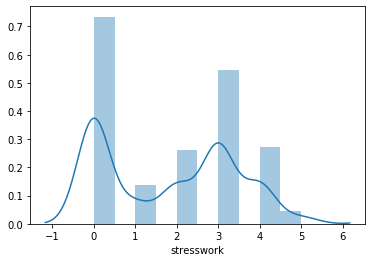

In [12]:
sns.distplot(cchs.stresswork)

Below we calculate 1000 sample means from 1000 subsamples of size 50 and inspect their distribution.
The plots below show that while the distribution of individual BMI measures is somewhat asymmetric bimodal, the distribution of means of size 50 is approximately symmetric.  The distribution of means is also approximately normal, as shown by the orange curve, which is the best-fitting normal approximation to the data.

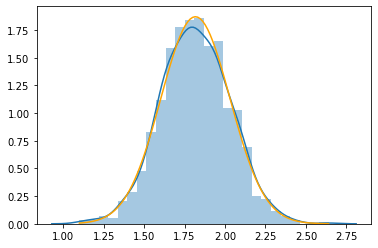

In [13]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = cchs.sample(m)
    sbp_mean.append(dx.stresswork.mean())
sns.distplot(sbp_mean)

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)

v = dx.stresswork
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')

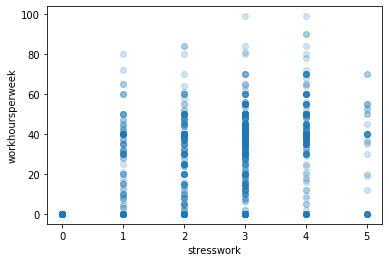

In [14]:
sns.regplot(x="stresswork", y="workhoursperweek", data=cchs, fit_reg=False, scatter_kws={"alpha": 0.2})


The above scatter plot shows the correlation between stress at work and work hours per week where we see a positive dependence between the two measures -- people working longer shifts tend to perceive much more stress at workplace, and vice-versa. However it is far from a perfect relationship as we see picks in different places.

Note: The zero group on stress at work means that people are not active as a labour force.

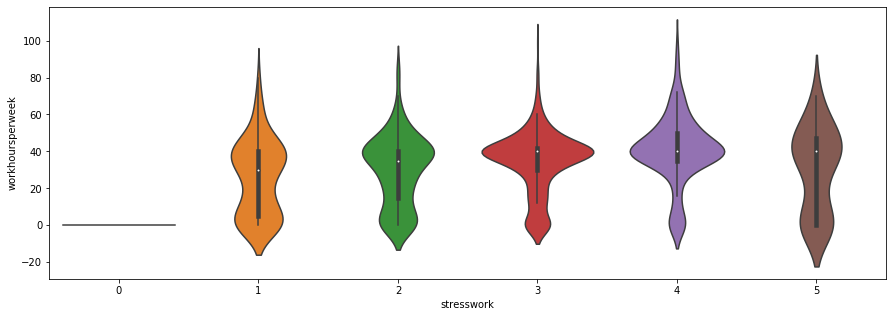

In [15]:
plt.figure(figsize=(15, 5))
a = sns.violinplot(cchs.stresswork, cchs.workhoursperweek)

We have enough data to see that a "violinplot" gives us a bit more insight into the shapes of the distributions compared to a other plot types.  The violinplot above is based on the work hours per week related to stress at work from CCHS data. 

We can see quite clearly that the distributions with low mean are slightly right-skewed ("not a all" and "quite a bit" stressed at work), while the distributions with high mean almost do not show in our dataset (it would be represented as left-skewed).  The other distributions have intermediate mean values, and are approximately asymmetrically distributed.  

Note also that most of the distribution has a middle concentration as the average of the population tend to work the regular 40 hours per week.

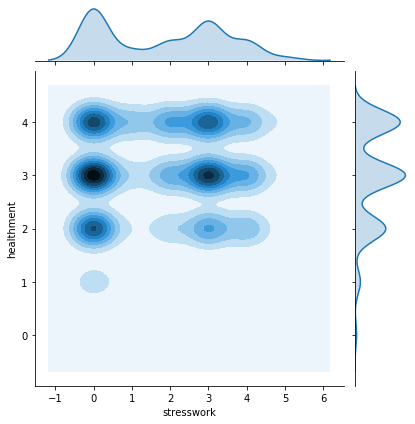

In [16]:
sns.jointplot(x="stresswork", y="healthment", kind='kde', data=cchs)

A way to avoid overplotting is to make a plot of the "density" of points. In the plots above, darker colors indicate where a greater number of points fall. The two plot margins show the densities for the stress at work and perceived mental health status separately, while the plots in the center shows their density jointly.

On this plot we note that surprisingly people who classify themselves in good mental health also declare levels of stress at work from "a bit" to "quite a bit" according to the classification rank, which is also noted on the boxplot below.

Note: We do not consider the "zero group" on stress at work because it refers to people who are not active in the labour force.


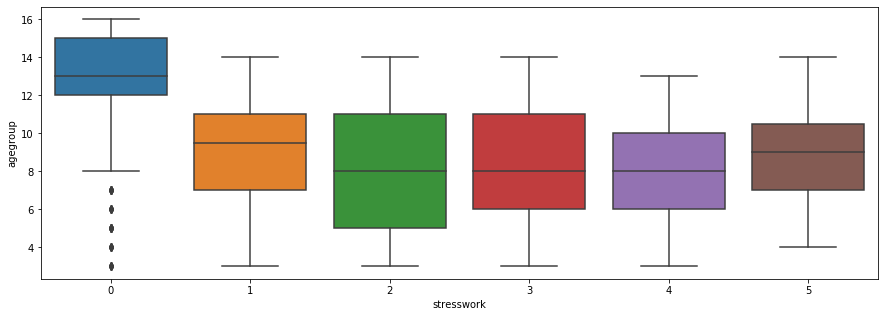

In [17]:
plt.figure(figsize=(15, 5))
a = sns.boxplot(cchs.stresswork, cchs.agegroup)

### Heterogeneity and stratification
Most human characteristics are complex -- they vary by gender, age, ethnicity, and other factors.  This type of variation is often referred to as "heterogeneity".  When such heterogeneity is present, it is usually productive to explore the data more deeply by stratifying on relevant factors.

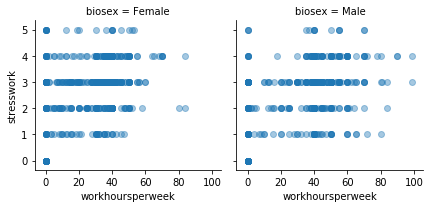

In [18]:
sns.FacetGrid(cchs, col="biosex").map(plt.scatter, "workhoursperweek", "stresswork", alpha=0.4).add_legend()

Above, we continue to probe the relationship between work hours per week and stress at work, stratifying first by gender, then by gender and education. The gender-stratified plot indicates that men tend to have somewhat less stress at work than women, despite of working longer shifts -- this is reflected in the fact that the cloud of points on the left is shifting up and to the right relatively to the relation longer hours = more stress.  In addition, the correlation between stress and working hours appears to be somewhat weaker in men approximately until  35 hours of work per week than in women. 

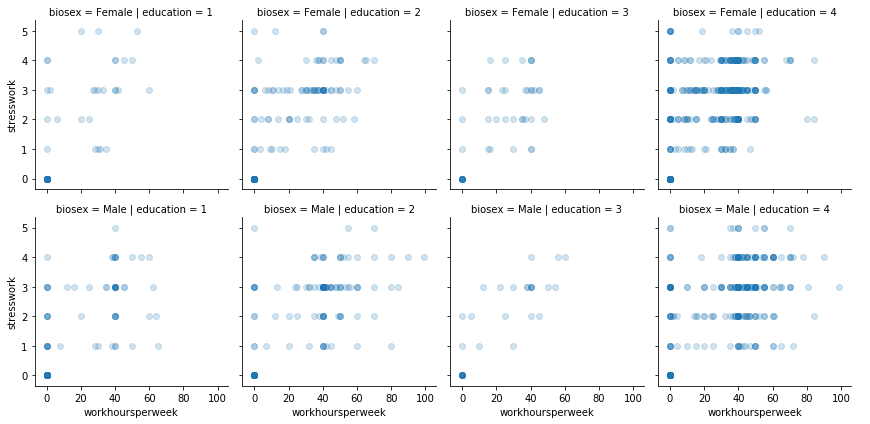

In [19]:
_ = sns.FacetGrid(cchs, col="education",  row="biosex").map(plt.scatter, "workhoursperweek", 
                                                            "stresswork", alpha=0.2).add_legend()


These scatterplots reveal differences in the means as well as differences in the degree of association (correlation) between different pairs of variables.  We see that although some groups tend to have higher/lower stress levels at work than others, the relationship between stress at work and working hours within genders is roughly similar across the highest educated group.  

One notable observation is that education group 4, which consists of people who have a Post Secondary Certificate, the correlation between stress at work and the lenght of working hours is stronger, especially for women which generaly do not tend to work overhours due to task at home and family supposedly .  This is not surprising, as greater heterogeneity can allow correlations to emerge that are indiscernible in more homogeneous data. 

We also see on the violin plot below that people on education groups 2 (Secondary School Graduate) and 4 (Post Secondary Certificate) have the highest levels of stress at work and Satisfaction at work is most noted on people part of education groups 2 (Secondary School Graduate) and 3 (Some Post Secondary Education) thoroughly. 

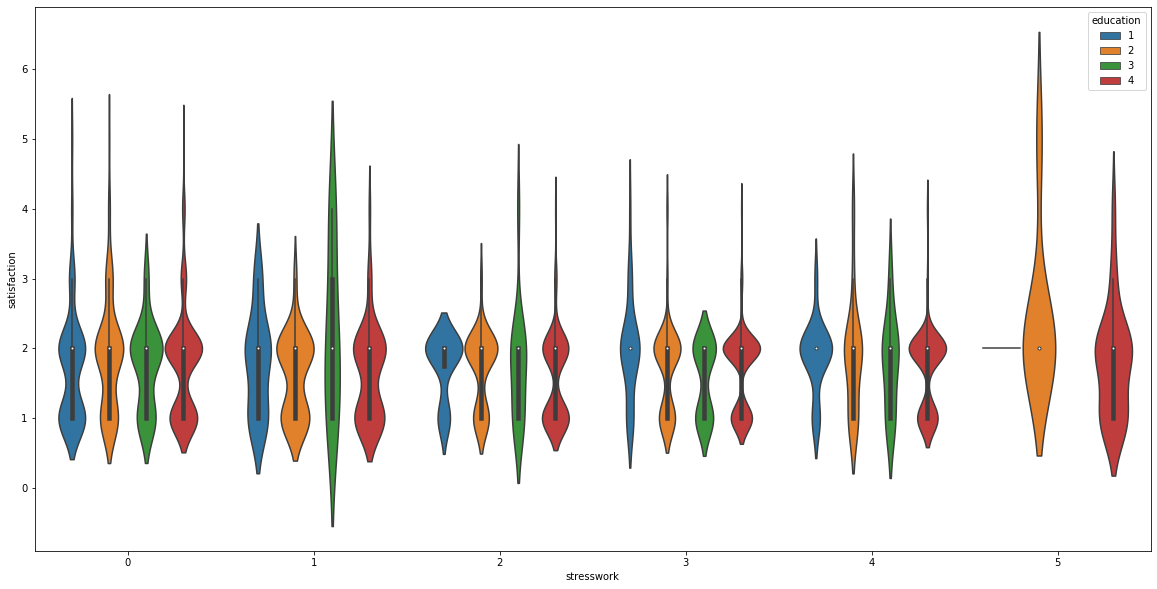

In [20]:
plt.figure(figsize=(20, 10))
a = sns.violinplot(cchs.stresswork, cchs.satisfaction, cchs.education)

### Understanding the correlation between features

We did not find any reasonable difference when relating stress at work and the consumption of alcohol other than in both gender groups there is a pick in stress level 3 classified as having "a bit" of stress (according to our classification table) in the workplace. 
However, we empirically know detrimental effects of drugs in our body that associated to poor mental and physical health may compromise your body system to work harmonically. 

The plot below allows us to play with different features and quickly understand which variables would be perceived as useful to our data exploration.  


In [21]:
display(cchs)